# ***DECISION TREE***

**Objective:**

The objective of this assignment is to apply Decision Tree Classification to a Heart disease dataset, analyse the performance of the model, and interpret the results.


In [3]:
import pandas as pd
hd=pd.read_excel("heart_disease.xlsx",sheet_name="Heart_disease")
hd.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0


In [4]:
hd.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    object 
 2   cp        908 non-null    object 
 3   trestbps  908 non-null    int64  
 4   chol      908 non-null    int64  
 5   fbs       908 non-null    bool   
 6   restecg   908 non-null    object 
 7   thalch    908 non-null    int64  
 8   exang     908 non-null    object 
 9   oldpeak   846 non-null    float64
 10  slope     908 non-null    object 
 11  thal      908 non-null    object 
 12  num       908 non-null    int64  
dtypes: bool(1), float64(1), int64(5), object(6)
memory usage: 86.1+ KB


If we observe the above info the fbs column comes in boolean.

In [5]:
hd.describe()

,age,trestbps,chol,thalch,oldpeak,num
count,908.000000,908.000000,908.000000,908.000000,846.000000,908.000000
mean,53.791850,133.430617,201.484581,135.957048,0.891253,1.008811
std,9.158031,20.401608,112.097949,26.804929,1.093875,1.144436
min,29.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.750000,120.000000,176.750000,118.000000,0.000000,0.000000
50%,54.000000,130.000000,224.000000,138.000000,0.500000,1.000000
75%,60.000000,144.000000,270.000000,156.000000,1.500000,2.000000
max,77.000000,200.000000,603.000000,202.000000,6.200000,4.000000


In [6]:
hd.duplicated().sum()

np.int64(1)

In [7]:
hd = hd.drop_duplicates().reset_index(drop=True)

In [8]:
hd.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalch,0
exang,0
oldpeak,62


As the outliers are present in
the oldpeak we replace the null values with the median of the oldpeak data.

<Axes: ylabel='oldpeak'>

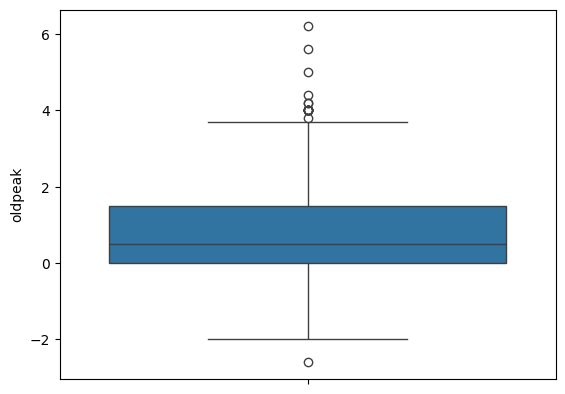

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(hd['oldpeak'])

In [10]:
hd['oldpeak']=hd['oldpeak'].fillna(hd['oldpeak'].median())

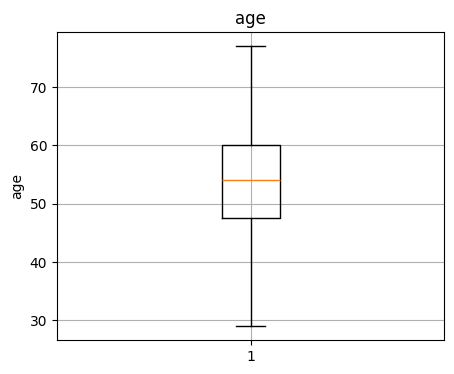

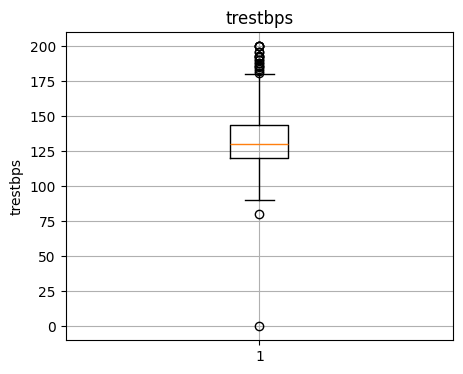

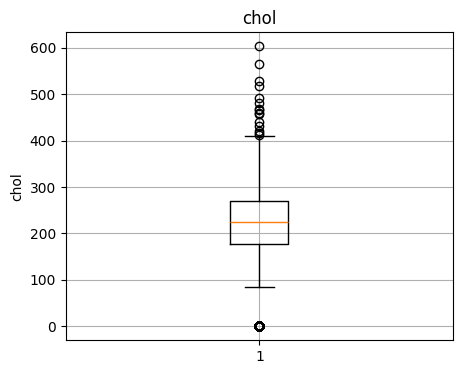

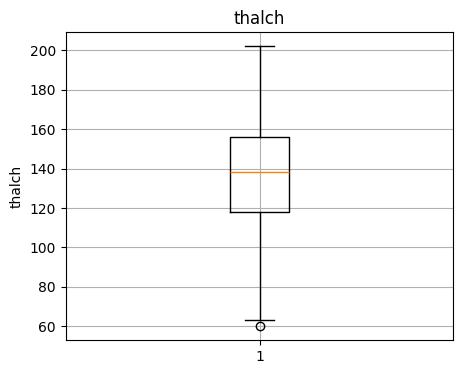

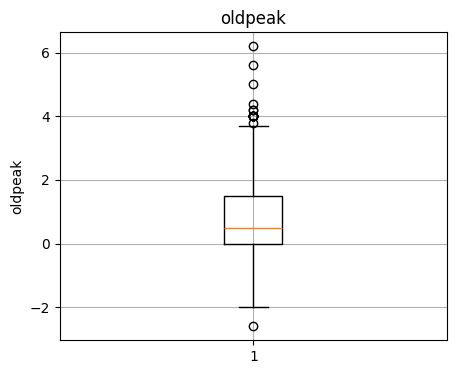

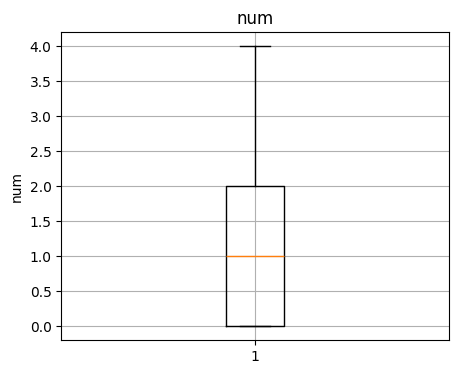

In [11]:
k= hd.select_dtypes(include=['int64', 'float64']).columns
for col in k:
    plt.figure(figsize=(5, 4))
    plt.boxplot(hd[col])
    plt.title(col)
    plt.ylabel(col)
    plt.grid(True)
    plt.show()

visualisng the data by histogram whether any data is correlated or not.

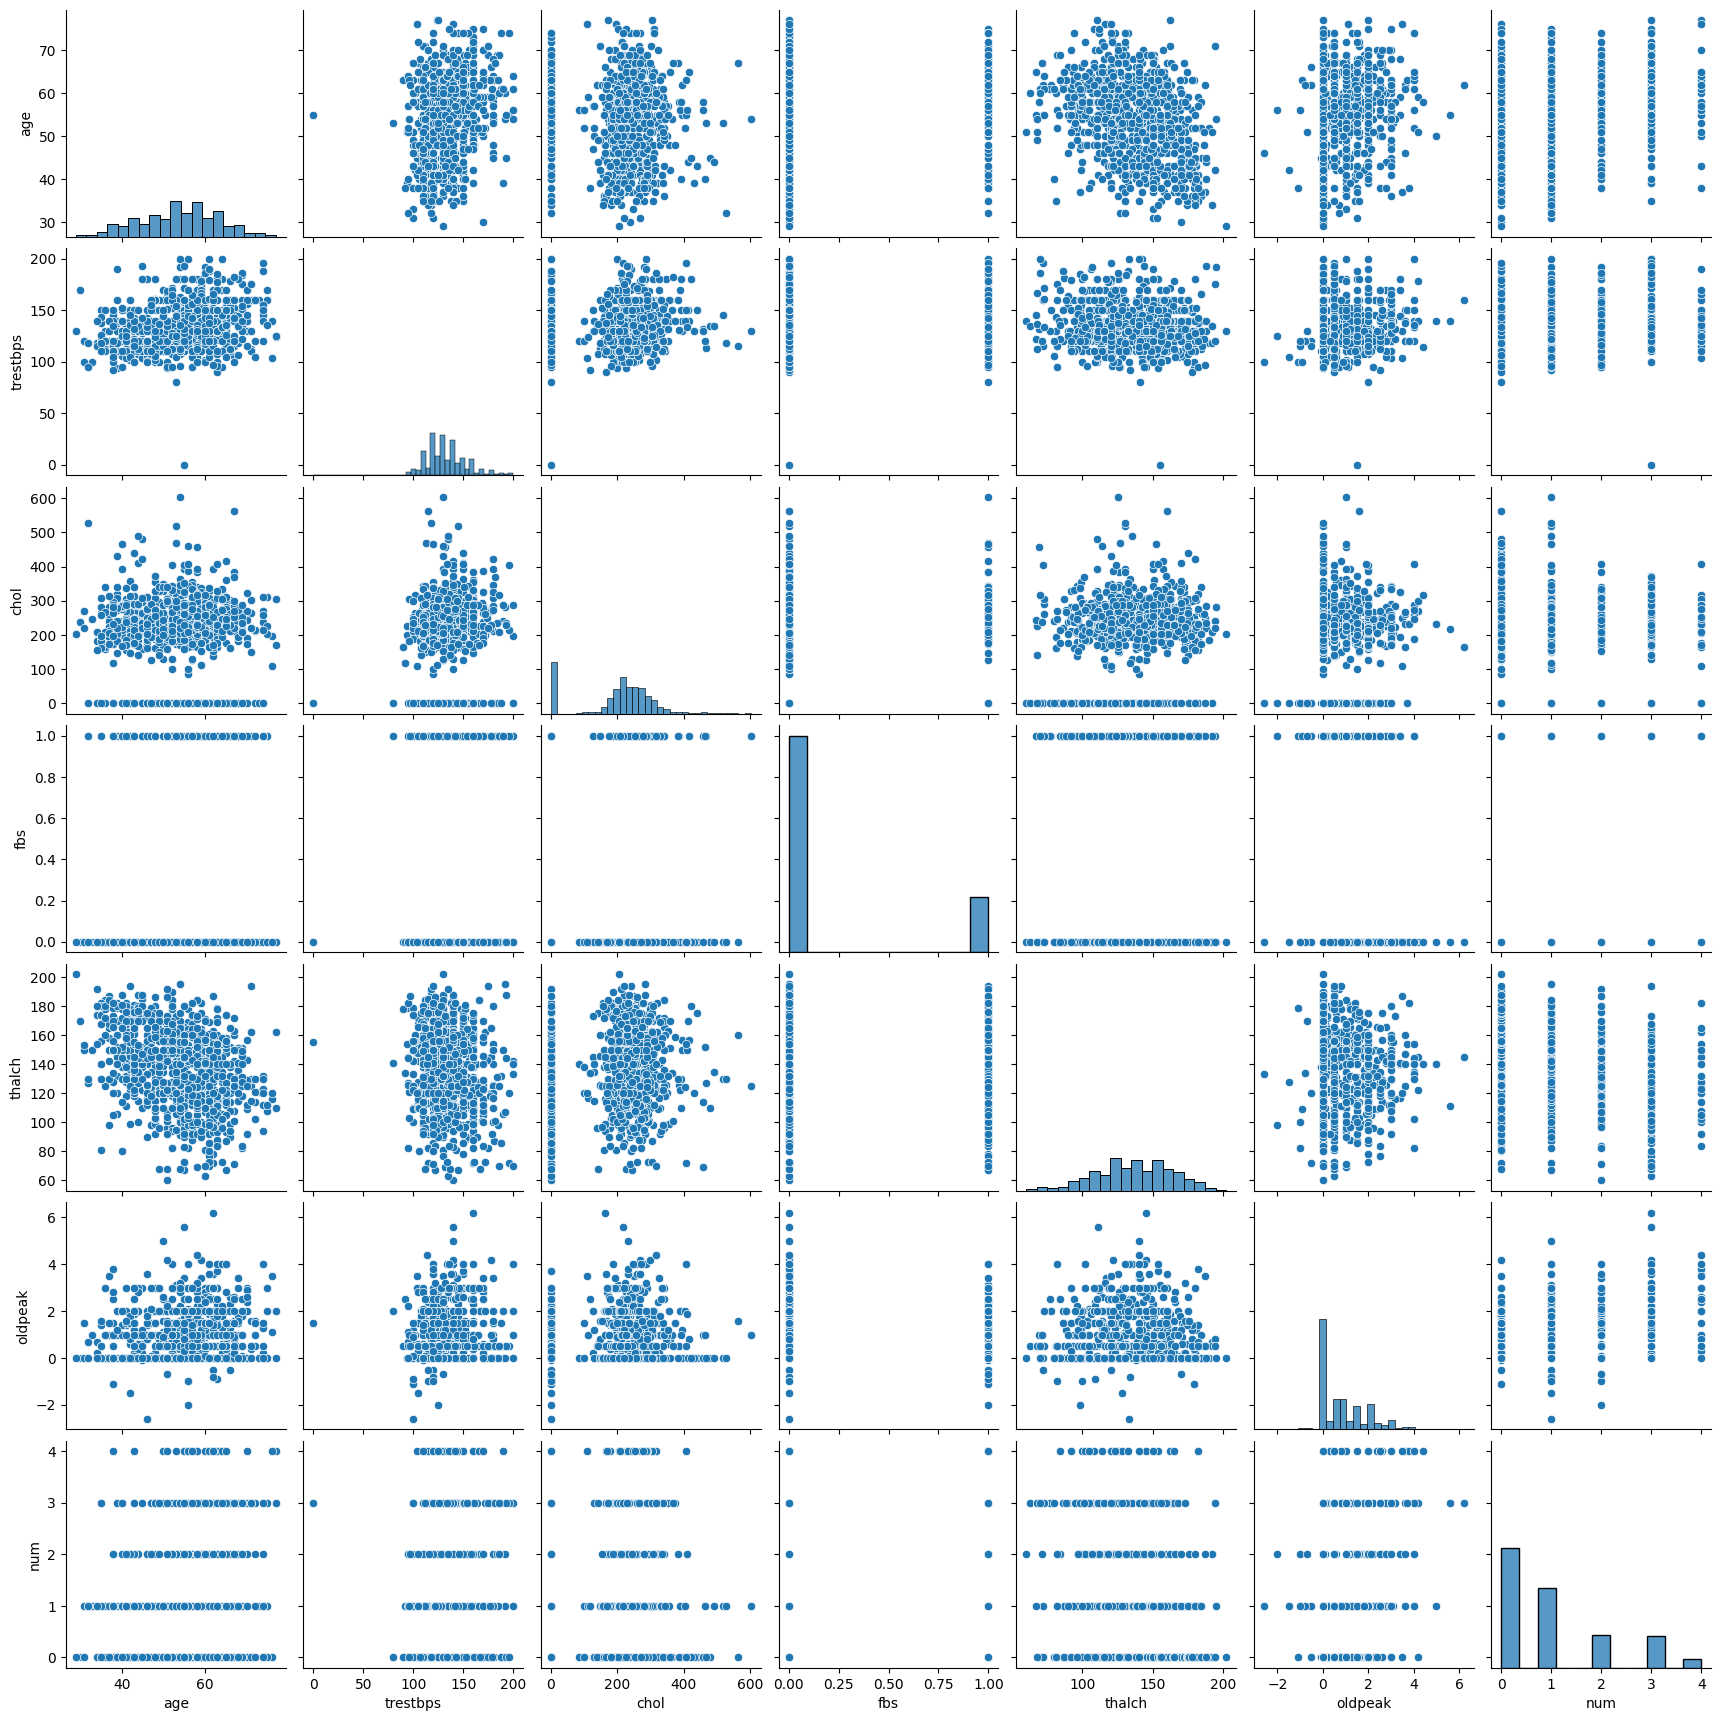

In [12]:
sns.pairplot(hd)



In [13]:
hd.corr(numeric_only=True)

,age,trestbps,chol,fbs,thalch,oldpeak,num
age,1.000000,0.253709,-0.100059,0.177004,-0.327868,0.218461,0.326227
trestbps,0.253709,1.000000,0.117392,0.112124,-0.132841,0.135775,0.136581
chol,-0.100059,0.117392,1.000000,-0.113651,0.198074,0.032357,-0.239065
fbs,0.177004,0.112124,-0.113651,1.000000,-0.065827,0.007703,0.156839
thalch,-0.327868,-0.132841,0.198074,-0.065827,1.000000,-0.113296,-0.322632
oldpeak,0.218461,0.135775,0.032357,0.007703,-0.113296,1.000000,0.407175
num,0.326227,0.136581,-0.239065,0.156839,-0.322632,0.407175,1.000000


Calculating the correlation between variables using **heatmap**

<Axes: >

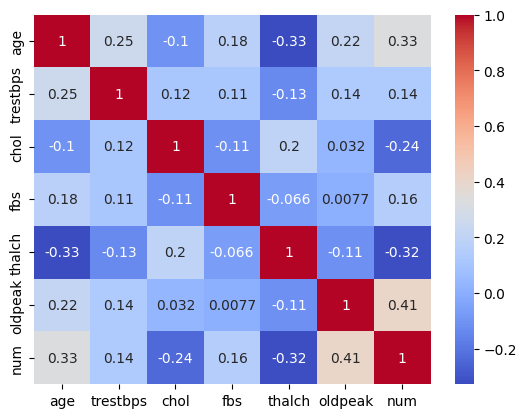

In [14]:
sns.heatmap(hd.corr(numeric_only=True), annot=True, cmap='coolwarm')

In [15]:
x_cont= hd[hd.columns[[0,3,4,7]]]

from sklearn.preprocessing import StandardScaler
SS = StandardScaler()
SS_X = SS.fit_transform(x_cont)
SS_X = pd.DataFrame(SS_X)
SS_X.columns = list(hd.columns[[0,3,4,7]])

In [16]:
hd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       907 non-null    int64  
 1   sex       907 non-null    object 
 2   cp        907 non-null    object 
 3   trestbps  907 non-null    int64  
 4   chol      907 non-null    int64  
 5   fbs       907 non-null    bool   
 6   restecg   907 non-null    object 
 7   thalch    907 non-null    int64  
 8   exang     907 non-null    object 
 9   oldpeak   907 non-null    float64
 10  slope     907 non-null    object 
 11  thal      907 non-null    object 
 12  num       907 non-null    int64  
dtypes: bool(1), float64(1), int64(5), object(6)
memory usage: 86.0+ KB


Converting the data into Label encoding

In [17]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
label=['age','cp', 'thal', 'slope', 'sex', 'restecg','oldpeak', 'exang']
for col in label:
    if col == 'exang':
        hd[col] = hd[col].astype(str)
    hd[col] = LE.fit_transform(hd[col])
hd.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,34,1,3,145,233,True,0,150,1,33,0,0,0
1,12,1,1,135,203,False,1,132,1,10,1,0,0
2,28,1,0,140,192,False,1,148,1,14,1,0,0
3,23,1,3,118,186,False,0,190,1,10,1,0,0
4,28,1,0,110,201,False,1,126,3,25,1,0,0


In [18]:
hd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   age       907 non-null    int64
 1   sex       907 non-null    int64
 2   cp        907 non-null    int64
 3   trestbps  907 non-null    int64
 4   chol      907 non-null    int64
 5   fbs       907 non-null    bool 
 6   restecg   907 non-null    int64
 7   thalch    907 non-null    int64
 8   exang     907 non-null    int64
 9   oldpeak   907 non-null    int64
 10  slope     907 non-null    int64
 11  thal      907 non-null    int64
 12  num       907 non-null    int64
dtypes: bool(1), int64(12)
memory usage: 86.0 KB


Combining the both data

In [19]:
df_new = pd.concat([SS_X,hd],axis=1)
df_new

,age,trestbps,chol,thalch,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,1.006097,0.568184,0.281318,0.523285,34,1,3,145,233,True,0,150,1,33,0,0,0
1,-1.396447,0.077848,0.013691,-0.148399,12,1,1,135,203,False,1,132,1,10,1,0,0
2,0.350858,0.323016,-0.084439,0.448654,28,1,0,140,192,False,1,148,1,14,1,0,0
3,-0.195175,-0.755723,-0.137964,2.015918,23,1,3,118,186,False,0,190,1,10,1,0,0
4,0.350858,-1.147992,-0.004151,-0.372294,28,1,0,110,201,False,1,126,3,25,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,-0.085969,-0.412488,-1.797250,-0.596189,24,1,0,125,0,False,1,120,1,25,2,2,4
903,0.896890,1.597890,-0.280698,-0.596189,33,1,0,166,170,False,2,120,3,39,1,2,4
904,0.241651,1.794024,-1.797250,-0.484242,27,1,2,170,0,False,0,123,3,35,0,1,4
905,0.241651,0.519151,0.058296,-1.155926,27,1,2,144,208,True,2,105,2,15,0,0,4


In [20]:
hd['num'] = hd['num'].apply(lambda val: 1 if val > 0 else 0)

In [108]:
X = hd.drop('num', axis=1)
Y = hd['num']

performing the **Decision Tree** using **Decision Tree classifier** by **Entropy** with maximum depth as 8 levels and minimum sample split as 5

In [121]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss,accuracy_score
import numpy as np
Y_pred_train = model.predict(X_train)
Y_pred_test = model.predict(X_test)
training_accracy = []
test_accuracy = []
training_loss = []
test_loss = []

for i in range(1, 501):
    X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size=0.20, random_state=i, stratify=Y)
    model = DecisionTreeClassifier(criterion='gini', max_depth=4) # 'entropy'
    model.fit(X_train,Y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test  = model.predict(X_test)
    training_accracy.append(accuracy_score(Y_train,y_pred_train))
    test_accuracy.append(accuracy_score(Y_test,y_pred_test))
    training_loss.append(log_loss(Y_train,Y_pred_train))
    test_loss.append(log_loss(Y_test,Y_pred_test))

print("Cross validation: Training accuracy score:", np.round(np.mean(training_accracy),2))
print("Cross validation: Test accuracy score:", np.round(np.mean(test_accuracy),2))
print("Cross validation: trianing loss:", np.round(np.mean(training_loss),2))
print("Cross validation: test loss:", np.round(np.mean(test_loss),2))

Cross validation: Training accuracy score: 0.82
Cross validation: Test accuracy score: 0.76
Cross validation: trianing loss: 17.81
Cross validation: test loss: 17.56


Plotting the **decision tree**


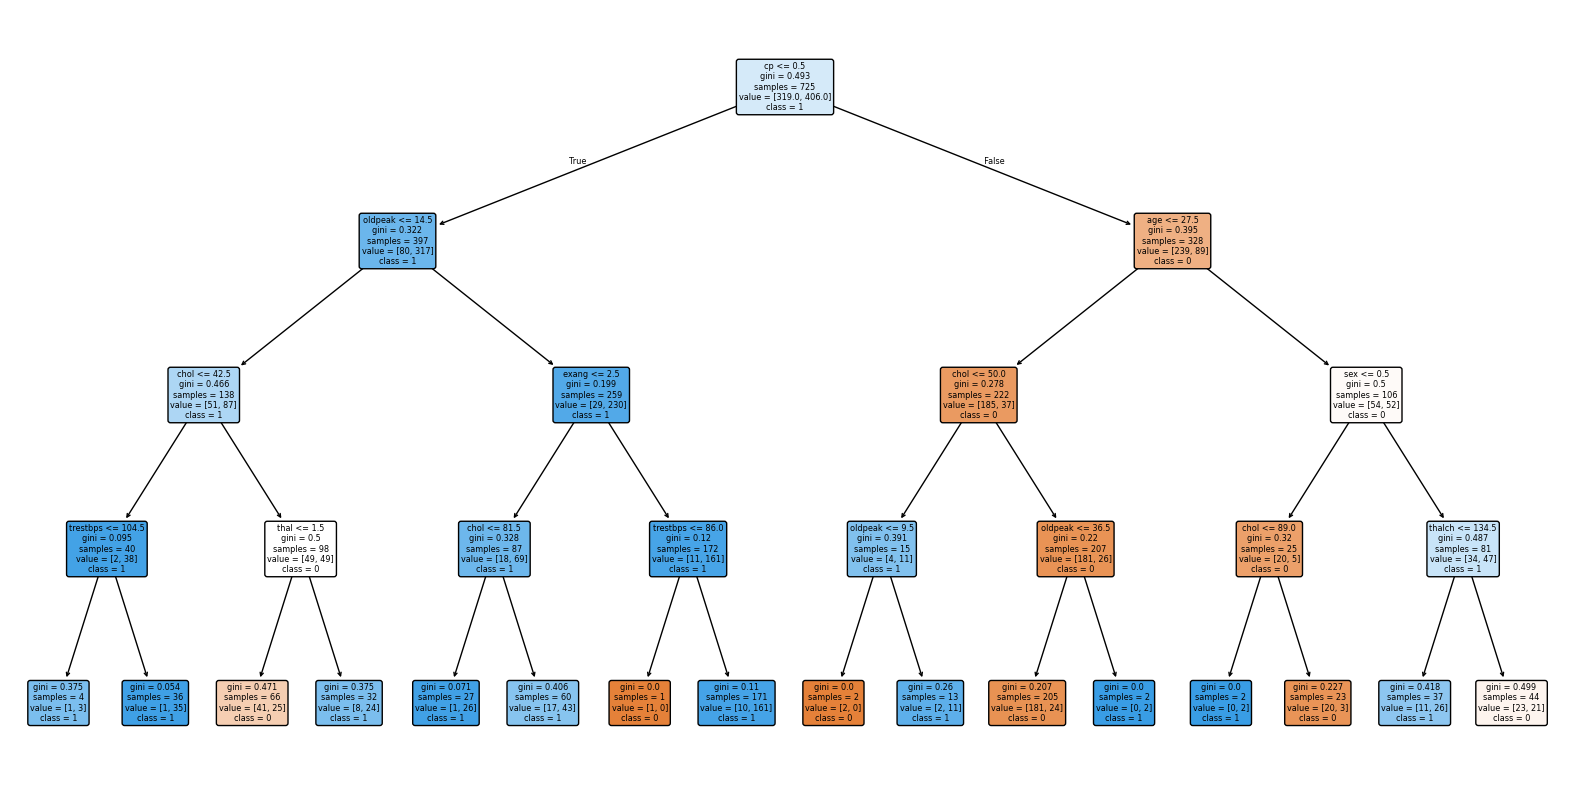

In [122]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Assuming 'model' is your trained DecisionTreeClassifier
plt.figure(figsize=(20,10))
plot_tree(model, filled=True, feature_names=X.columns, class_names=['0', '1'], rounded=True) # Assuming 'high' represents two classes: Low and High
plt.show()

In [123]:
from sklearn.tree import DecisionTreeClassifier

n_nodes = model.tree_.node_count
depth = model.tree_.max_depth

print(f"Number of nodes: {n_nodes}")
print(f"Depth of the tree: {depth}")

Number of nodes: 31
Depth of the tree: 4


To calculate the accuracy of the model we have to go through the **classification report.**

In [129]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,preds))

              precision    recall  f1-score   support

           0       0.44      0.45      0.45        80
           1       0.56      0.56      0.56       102

    accuracy                           0.51       182
   macro avg       0.50      0.50      0.50       182
weighted avg       0.51      0.51      0.51       182



calculating the accuracy score directly between the **predicted** test values and the **actual** test values.

In [133]:
accuracy_score(Y_test,preds)

0.7197802197802198

As if we can see with **gini criteria** it goes with the **accuracy of 76%** that was good with the predicted outomes.

In [130]:
p=model.predict(X_test)
np.mean(p==Y_test)

np.float64(0.7637362637362637)

***CONCLUSION:***

In this , a Decision Tree Classification model was applied to predict heart disease based on patient data. The model was trained, evaluated, and showed a reasonable accuracy, indicating that it successfully learned patterns in the dataset. Both entropy and gini criteria were tested, and the results showed consistent performance. Overall, the model performed well, but further tuning or advanced methods could help improve its accuracy.

**INTERVIEW QUESTIONS:**

**1. What are some common hyperparameters of decision tree models, and how do they affect the model's performance?**

*   Decision Tree models use hyperparameters to control their complexity and performance.
*   max_depth limits how deep the tree can grow, helping to prevent overfitting.

*   min_samples_split and min_samples_leaf control when a node should split, improving generalization.

*   The "gini" or "entropy" affects how splits are evaluated during training.





**2. What is the difference between the Label encoding and One-hot encoding?**


*   Label Encoding assigns a unique integer to each category, which can imply an incorrect order.It is suitable for ordinal data where the order of categories matters.
*   One-Hot Encoding creates binary columns for each category, avoiding any ordinal assumptions.It is better for nominal data where categories have no inherent order.
